In [4]:
import numpy as np
import scipy.optimize
import matplotlib.pyplot as plt

Eulers and Runge-Kutta methods for solving ODEs

Euler's method is a simple numerical method for solving first-order ODEs. It uses a forward difference approximation to estimate the derivative of the solution at each time step and updates the solution accordingly. The basic formula for Euler's method is,
\begin{equation}
 y_{n+1} = y_n + h \cdot f(t_n, y_n)
\end{equation}
where, $y_n$ is the approximate solution at time $t_n$, $h$ is the time step and $f(t_n, y_n)$ is the derivative of the solution at time $t_n$.

Euler's method has a first-order accuracy ($O(h)$), which means that the error in the approximation is proportional to the time step. It is simple to implement but may not be accurate for ODEs with rapidly changing or oscillatory solutions.

Runge-Kutta methods are a family of numerical methods for solving ODEs. These methods work by approximating the solution of an ODE at discrete time steps, also known as time discretization. The most commonly used Runge-Kutta method is the fourth-order Runge-Kutta (RK4) method.

The RK4 method uses a weighted average of four derivative evaluations to estimate the derivative of the solution at each time step. The basic formula for RK4 is,

\begin{equation}
y_{n+1} = y_n + \frac{h}{6} \left( k_1 + 2k_2 + 2k_3 + k_4 \right),
\end{equation}

where $y_n$ is the approximate solution at time $t_n$, $h$ is the time step, and $k_1, k_2, k_3, k_4$ are the weighted derivatives of the solution at time $t_n$. The weighted derivatives are calculated as follows,
\begin{align}
k_1 &= f(t_n, y_n), \\
k_2 &= f\left(t_n + \frac{h}{2}, y_n + \frac{h}{2} \cdot k_1 \right), \\
k_3 &= f\left(t_n + \frac{h}{2}, y_n + \frac{h}{2} \cdot k_2 \right), \\
k_4 &= f\left(t_n + h, y_n + h \cdot k_3 \right).
\end{align}

RK4 has a fourth-order accuracy ($O(h^4)$). Hence it is more accurate than Euler's method but is more computationally expensive.

The following code implements Euler's method and RK4 for solving the following second-order ODE,
\begin{equation}
\frac{d^2 u}{dt^2} = -u
\end{equation}

where $u = (x,y)$, $x(0) = 1$ and $y(0) = 1$.



Finite-Difference Method
The finite-difference method is a numerical method to approximate solutions to partial differential equations (PDEs) on a uniform discrete grid. It works by approximating the derivative at each grid point using finite differences. Boundary value problems (BVPs) are differential equations within a domain with defined constraints, called boundary conditions. Hence the solution to the PDE must satisfy these boundary conditions. The local truncation error is $O(h)$, where $h$ is the step size. Thus, the error is proportional to the step size. Therefore, increasing the number of points in the grid makes the approximation more accurate.

A Dirichlet boundary condition is where the boundary value is the solution. A Neumann boundary condition is where the derivative of the solution is the boundary value. A Robin boundary condition is a combination of Dirichlet and Neumann boundary conditions. The boundary value is the derivative of the solution plus a function.

To illustrate the use of finite differences with these boundary conditions, we can consider the BVP,
\begin{equation}
 d^2u/dx^2 + q(x) = 0, u(a) = 0, u(b) = 0.
\end{equation}
We will set $q(x) = 1$, $a = 0$, and $b = 1$ for simplicity. By applying Dirichlet, Neumann, and Robin boundary conditions and obtaining different solutions we can see how the approximations differ from the exact solution $u_{\text{exact}} = \frac{1}{2} \cdot x \cdot (1 - x)$.

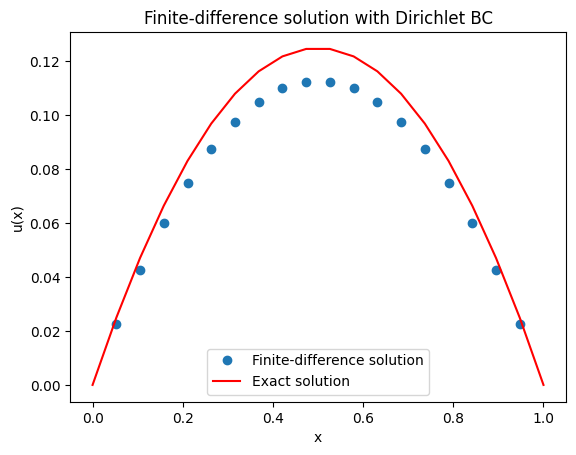

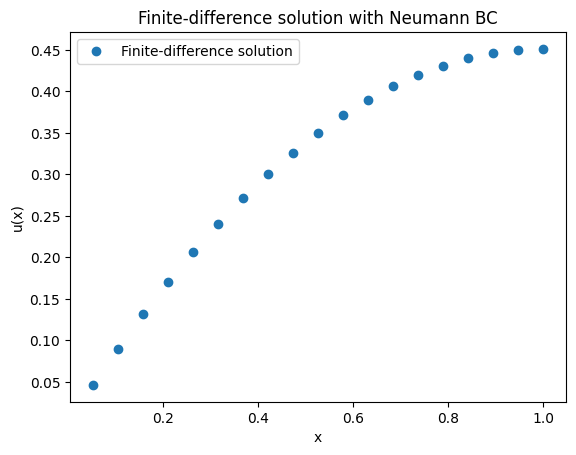

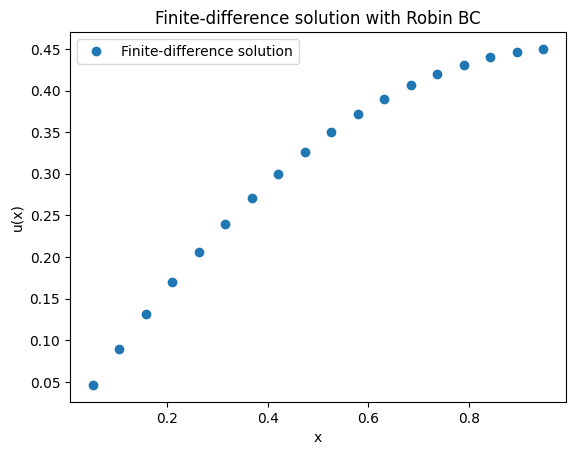

In [2]:
from BVPsolve import solve_bvp
N = 21; a = 0; b = 1
alpha = 0; beta = 0; gamma = 1; delta = 0
q = lambda x: np.ones(np.size(x))
solve_bvp(N, a, b, alpha, beta, q, "dirichlet")
solve_bvp(N, a, b, alpha, beta, q, "neumann", delta=delta)
solve_bvp(N, a, b, alpha, beta, q, "robin", gamma=gamma)

For each type of boundary condition, the numerical approximation has a large truncation error when $N = 21$. By setting $N = 101$ the step size is much smaller therefore the error is much smaller.

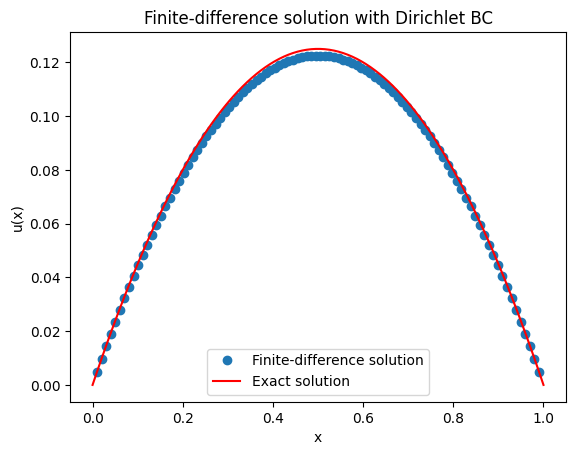

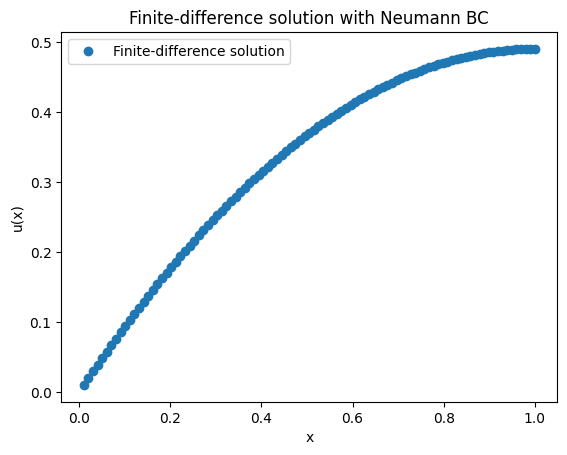

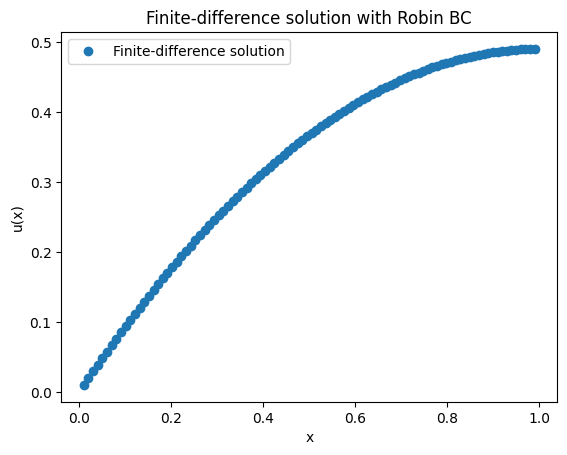

In [3]:
N = 101
solve_bvp(N, a, b, alpha, beta, q, "dirichlet")
solve_bvp(N, a, b, alpha, beta, q, "neumann", delta=delta)
solve_bvp(N, a, b, alpha, beta, q, "robin", gamma=gamma)